Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [0]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [1]
Predicted: 1 , Actual: [0]
Predicted: 0 , Actual: [0]
P

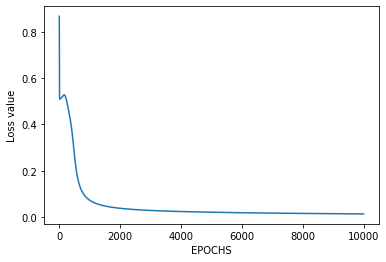

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) # makes the random numbers predictable

def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx):
    return sx * (1 - sx)

# Cost functions.
def cost(predicted, truth):
    return truth - predicted

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[0,1,1,0]]).T

# Lets drop the last row of data and use that as unseen test.
X = xor_input
Y = xor_output

# Define the shape of the weight vector.
num_data, input_dim = X.shape
# Lets set the dimensions for the intermediate layer.
hidden_dim = 5
# Initialize weights between the input layers and the hidden layer.
W1 = np.random.random((input_dim, hidden_dim))

# Define the shape of the output vector. 
output_dim = len(Y.T)
# Initialize weights between the hidden layers and the output layer.
W2 = np.random.random((hidden_dim, output_dim))

num_epochs = 10000
learning_rate = 1.0
losses = np.zeros((num_epochs, 1))
for epoch_n in range(num_epochs):
    layer0 = X
    # Forward propagation.
    
    # Inside the perceptron, Step 2. 
    layer1 = sigmoid(np.dot(layer0, W1))
    layer2 = sigmoid(np.dot(layer1, W2))

    # Back propagation (Y -> layer2)
    
    # How much did we deviate in the predictions?
    layer2_error = cost(layer2, Y) #cross entropy error function
    # In what direction is the target value?
    # Were we really close? If so, don't change too much.
    layer2_delta = layer2_error * sigmoid_derivative(layer2)

    
    # Back propagation (layer2 -> layer1)
    # How much did each layer1 value contribute to the layer2 error in changing weights?
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)
    
    # update weights
    W2 +=  learning_rate * np.dot(layer1.T, layer2_delta)
    W1 +=  learning_rate * np.dot(layer0.T, layer1_delta)

    for x, y in zip(X, Y):
        layer1_prediction = sigmoid(np.dot(W1.T, x)) # Feed the unseen input into trained W.
        prediction = layer2_prediction = sigmoid(np.dot(W2.T, layer1_prediction)) # Feed the unseen input into trained W.
        print(f"Predicted:", int(prediction > 0.5),f", Actual:", y)
        losses[epoch_n, 0]= cost(y,prediction)

plt.figure()
plt.plot(losses)
plt.gcf().set_facecolor('white')
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show() 